In [28]:
from DataSet import DataSet
import matplotlib.pyplot as plt 
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from os import listdir
from os.path import isfile, join
import re
import os
import numpy as np
device = torch.device("cpu")

manual_seed = 12
random.seed(manual_seed)
torch.manual_seed(manual_seed)

In [29]:
xy = np.load(f'train/xy_0.npz')

In [30]:
d=xy['data']
d.shape

(1024, 7, 128, 128)

In [31]:
h=xy['head']
h.shape

(1024, 3)

In [32]:
def ishows(*lsts):
    columns = len(lsts)
    rows = len(lsts[0])
    fig, axs = plt.subplots(rows, columns, figsize=(4*columns, 4*rows))
    for i in range(rows):
        for j in range(columns):
            axs[i][j].imshow(lsts[j][i, 0], aspect='auto')

In [33]:
from models.vgg_32 import Encoder
from models.vgg_32 import Decoder

In [34]:
netE = torch.load('tmp/encoder_7_45000', map_location=torch.device('cpu'))
netD = torch.load('tmp/decoder_7_45000', map_location=torch.device('cpu'))

In [35]:
i = 150
b = 8
vec = netE(torch.tensor(d[i:i+b]))
y = netD(vec).detach().numpy()

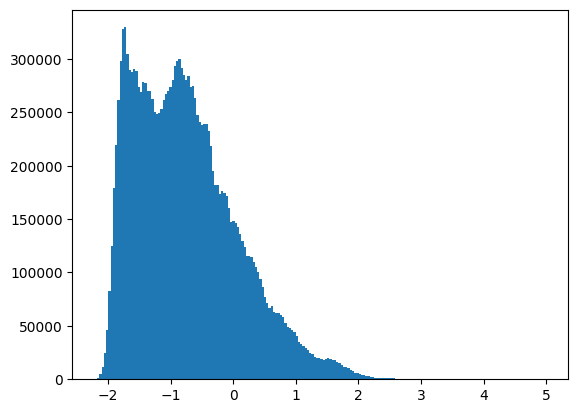

In [24]:
coord = 6
x = d[:, coord]
x = x[x < 5]
x = x[x > -5]
x=plt.hist(x.flatten(), bins=200)

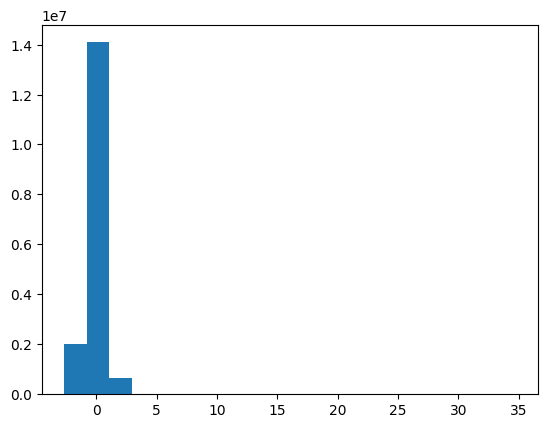

In [42]:
coord = 0
x=plt.hist(d[i:i+b, coord].flatten(), bins=20)

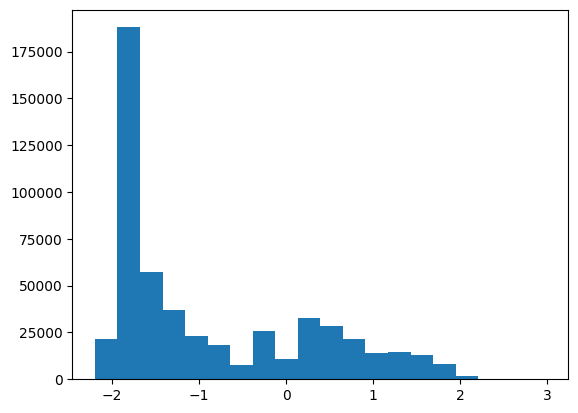

In [39]:
x = y[:, coord]
x = x[x<3]
x = x[x>-3]
x=plt.hist(x.flatten(), bins=20)

In [62]:
y[y>d[i:i+b].max()] = d[i:i+b].max()
y[y<d[i:i+b].min()] = d[i:i+b].min()

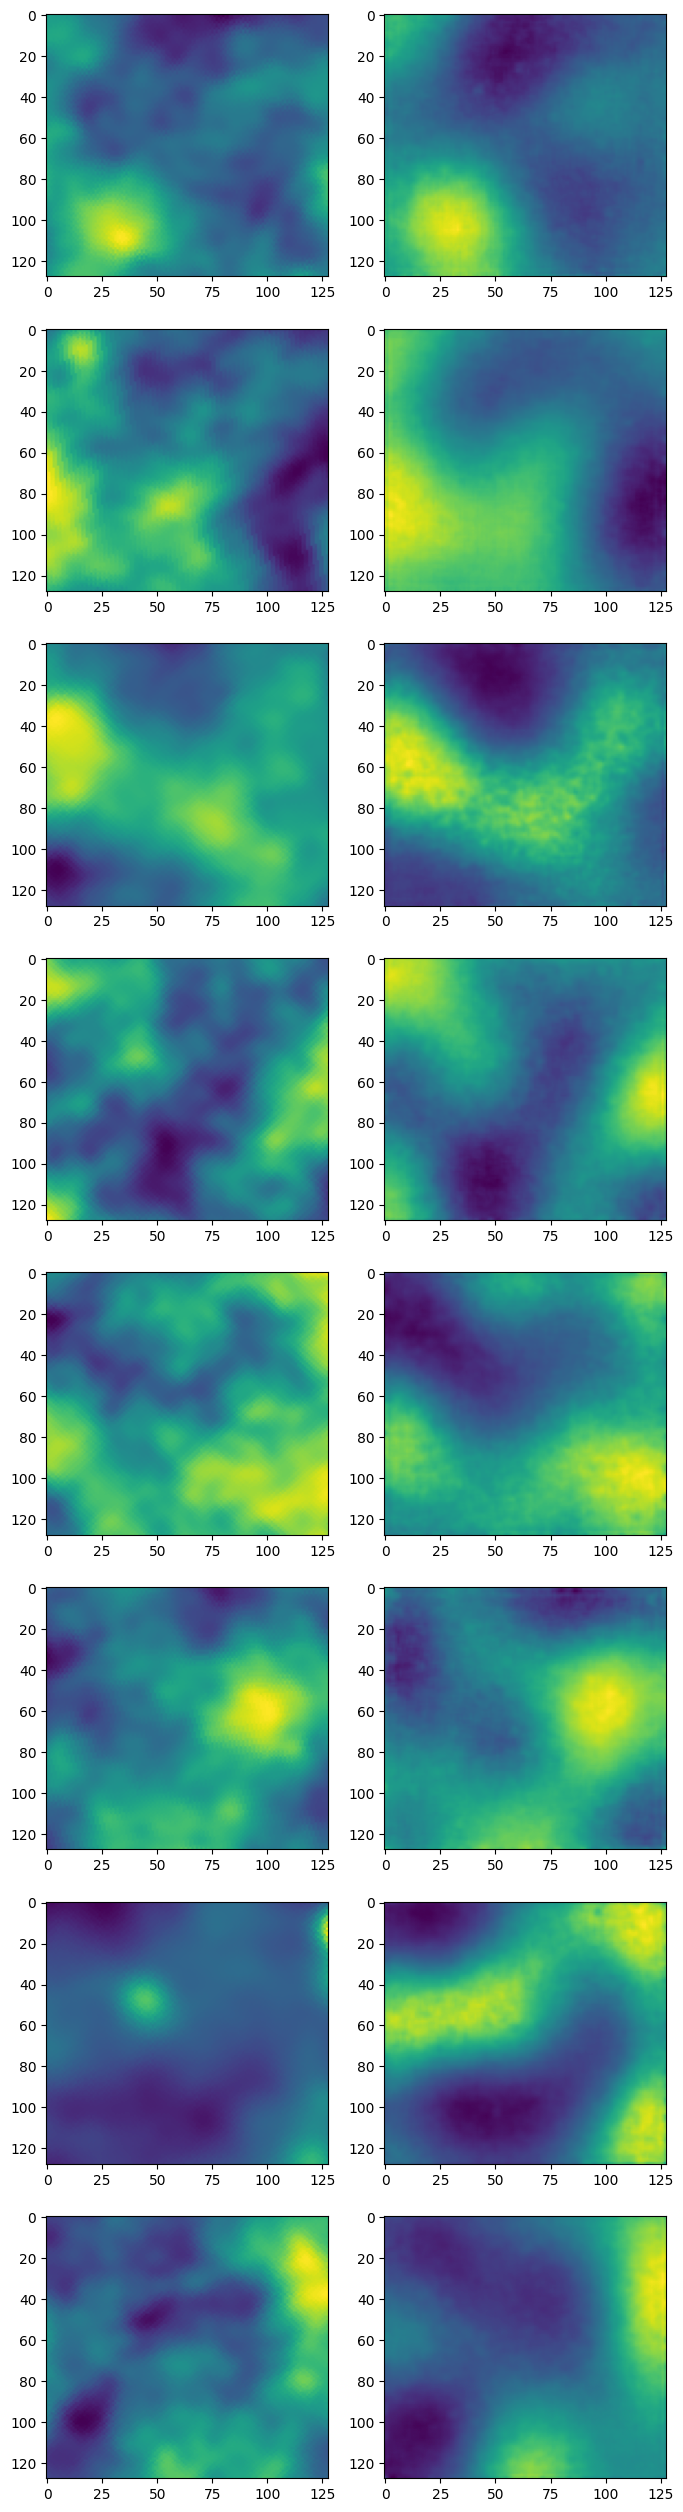

In [36]:
coord = 0
ishows(d[i:i+b], y[:])

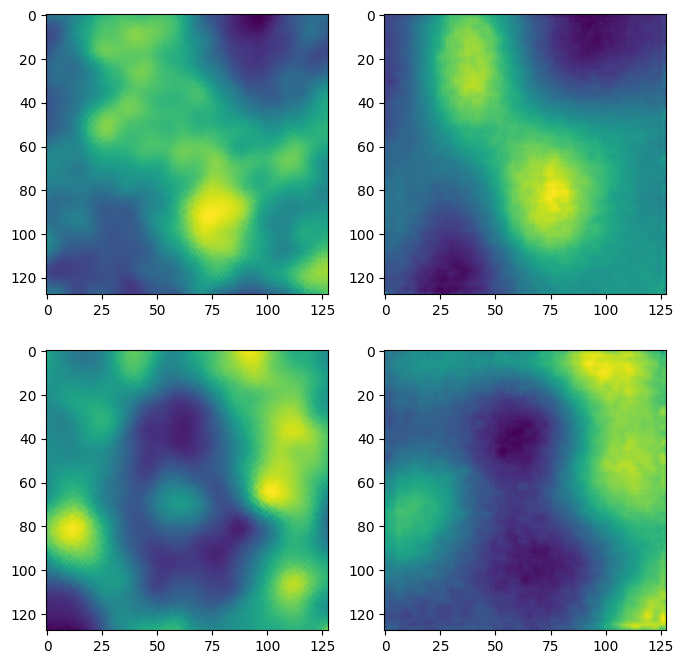

In [61]:
k=1
ishows(d[i+k:i+k+2], y[k:k+2])

In [65]:
files = [
    'data/HFI_SkyMap_100_2048_R2.02_full.fits'
]
ds = DataSet(files, batch_size=16)

In [71]:
h

array([[  1.        , 117.2587954 ,  70.9818587 ],
       [  1.        ,  63.99721598, -11.64839429],
       [  1.        , 128.59010924,  46.75948677],
       ...,
       [  1.        , 151.41073075, -46.80437476],
       [  1.        , 252.7124993 ,  22.39975617],
       [  1.        , 306.67663599,  48.5554861 ]])

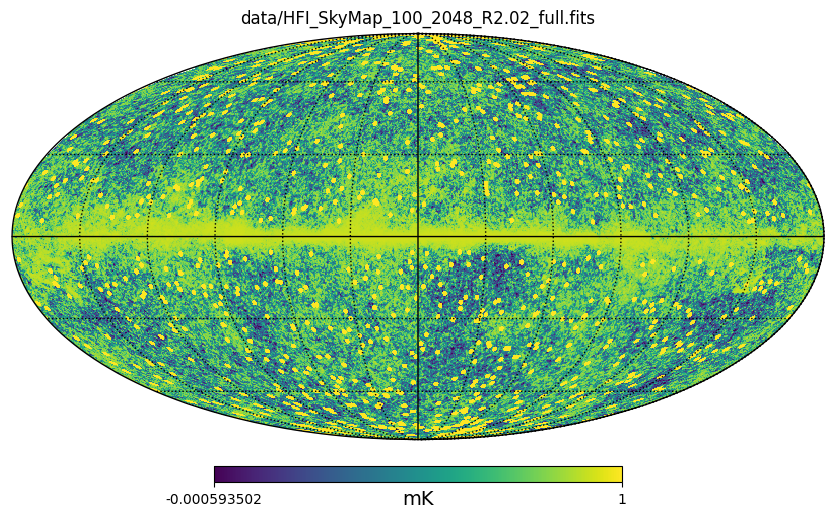

In [81]:
for i in range(1024):
    ds.m[0].set_disc(1, radius=h[i,0], theta=h[i,2], phi=h[i,1])
ds.m[0].view()